In [1]:
from mlutils import Inspector

import torch
from torch.autograd import Variable
from torch.autograd import Function
from torch import nn
from torchvision import models
from torchvision import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def preprocess_image(img):
    means=[0.485, 0.456, 0.406]
    stds=[0.229, 0.224, 0.225]

    preprocessed_img = img.copy()[: , :, ::-1]
    for i in range(3):
        preprocessed_img[:, :, i] = preprocessed_img[:, :, i] - means[i]
        preprocessed_img[:, :, i] = preprocessed_img[:, :, i] / stds[i]
    preprocessed_img = \
        np.ascontiguousarray(np.transpose(preprocessed_img, (2, 0, 1)))
    preprocessed_img = torch.from_numpy(preprocessed_img)
    preprocessed_img.unsqueeze_(0)
    input = Variable(preprocessed_img, requires_grad = True)
    return input

In [3]:
img = cv2.imread('asset/both.png', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inp = preprocess_image(img)

In [4]:
model = models.vgg19(pretrained=True)
loss_fn = nn.CrossEntropyLoss()

class Opts:
    def __init__(self):
        self.num_classes = 1000

opt = Opts()
inspector = Inspector(opt, model)
inspector.regist_layers('features.35')
inspector.inspect(inp)
outputs = inspector.show_cam_on_images(img.transpose(2, 0, 1))


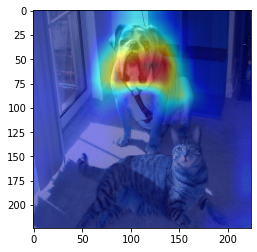

1.0
0.0


In [5]:
plt.imshow(outputs[0].transpose((1, 2, 0)))
plt.show()
print(outputs[0].max())
print(outputs[0].min())